In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
import seaborn as sns
import math
import os

In [93]:
#from colors import *
sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(25, 7), "xtick.bottom": True, "grid.linestyle": ":"})

### Preprocessing

In [94]:
PATH = "../data/easteregg_everything_so_far_250"

files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]

In [95]:
file_data = []
diff_means = []
for file in files:
    data_in = pd.read_csv(f"{PATH}/{file}")
    try:
        mean = data_in.query("fw != -1 & diff > 0")['diff'].mean()
        if not math.isnan(mean):
            diff_means.append(mean)
    except:
        print(data_in, file)
    file_data.append(data_in)
    
data = pd.concat(file_data)

In [96]:
data = data[data['framework'] != 'glumpy_sdl']
data = data[data['framework'] != 'glumpy_glfw']
data = data[data['framework'] != 'glumpy_qt5']
data = data[data['framework'] != 'glumpy_pyglet']

In [97]:
nones = data[data['program'] == 'none']
runnings = data[data['program'] != 'none']
runnings_cleaned = runnings[runnings['fw'] != -1]
data = pd.concat([nones, runnings_cleaned])

In [98]:
#TODO: find another way for recignizing whether framework was started/has decorations/another issue occurred
#data = data[data['ete'] > 200]

data['ete'] = data['ete'] / 1000
data['fw'] = data['fw'] / 1000
data['diff'] = data['diff'] / 1000

data.loc[data.fw == -0.001, 'fw'] = -1
data.loc[data.program == 'windup_fullscreen', 'program'] = 'windup'
data.loc[data.fullscreen == 'small', 'fullscreen_mode'] = '5.0 - small'

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_16112\1923954766.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5.0 - small' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data.fullscreen == 'small', 'fullscreen_mode'] = '5.0 - small'


In [99]:
framework_count = data['framework'].nunique()
sqrt = int(math.sqrt(framework_count)) + 1
framework_list = data['framework'].unique()

# Framework Latency

In [100]:
COLOR_DARK_BLUE = '#18206F'
COLOR_MEDIUMDARK_BLUE = '#3661AB'
COLOR_MEDIUMLIGHT_BLUE = '#5CABFF'
COLOR_LIGHT_BLUE = '#0FDFFF'

COLOR_DARK_GREEN = '#416224'
COLOR_MEDIUMDARK_GREEN = '#4FB800'
COLOR_MEDIUMLIGHT_GREEN = '#AEA700'
COLOR_LIGHT_GREEN = '#CDD30F'

COLOR_GLUTROT = '#DA3C43'
COLOR_DARK_RED = '#EC6200'
COLOR_MEDIUM_RED = '#ff8f1c'
COLOR_LIGHT_RED = '#ffb412'

HEIDENELKE_1 = '#9c004b'
HEIDENELKE_2 = '#cc0063'
HEIDENELKE_3 = '#f50076'
HEIDENELKE_4 = '#ff3396'
PALETTE_HEIDENELKE = [HEIDENELKE_1, HEIDENELKE_2, HEIDENELKE_3, HEIDENELKE_4]

PALETTE_REDS = [COLOR_GLUTROT, COLOR_DARK_RED, COLOR_MEDIUM_RED, COLOR_LIGHT_RED]
PALETTE_REDS_SIMPLE = [COLOR_GLUTROT]

PALETTE_BLUES = [COLOR_DARK_BLUE, COLOR_MEDIUMDARK_BLUE, COLOR_MEDIUMLIGHT_BLUE, COLOR_LIGHT_BLUE]
PALETTE_BLUES_SIMPLE = [COLOR_DARK_BLUE, COLOR_LIGHT_BLUE]

PALETTE_GREENS = [COLOR_DARK_GREEN, COLOR_MEDIUMDARK_GREEN, COLOR_MEDIUMLIGHT_GREEN, COLOR_LIGHT_GREEN]
PALETTE_MULTI = [COLOR_MEDIUMDARK_BLUE, COLOR_GLUTROT, HEIDENELKE_1, COLOR_MEDIUMDARK_GREEN]

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_16112\2458740648.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


['windup', 'getpixel', 'bitblt', 'getdbits', 'windup', 'getpixel', 'bitblt', 'getdbits']


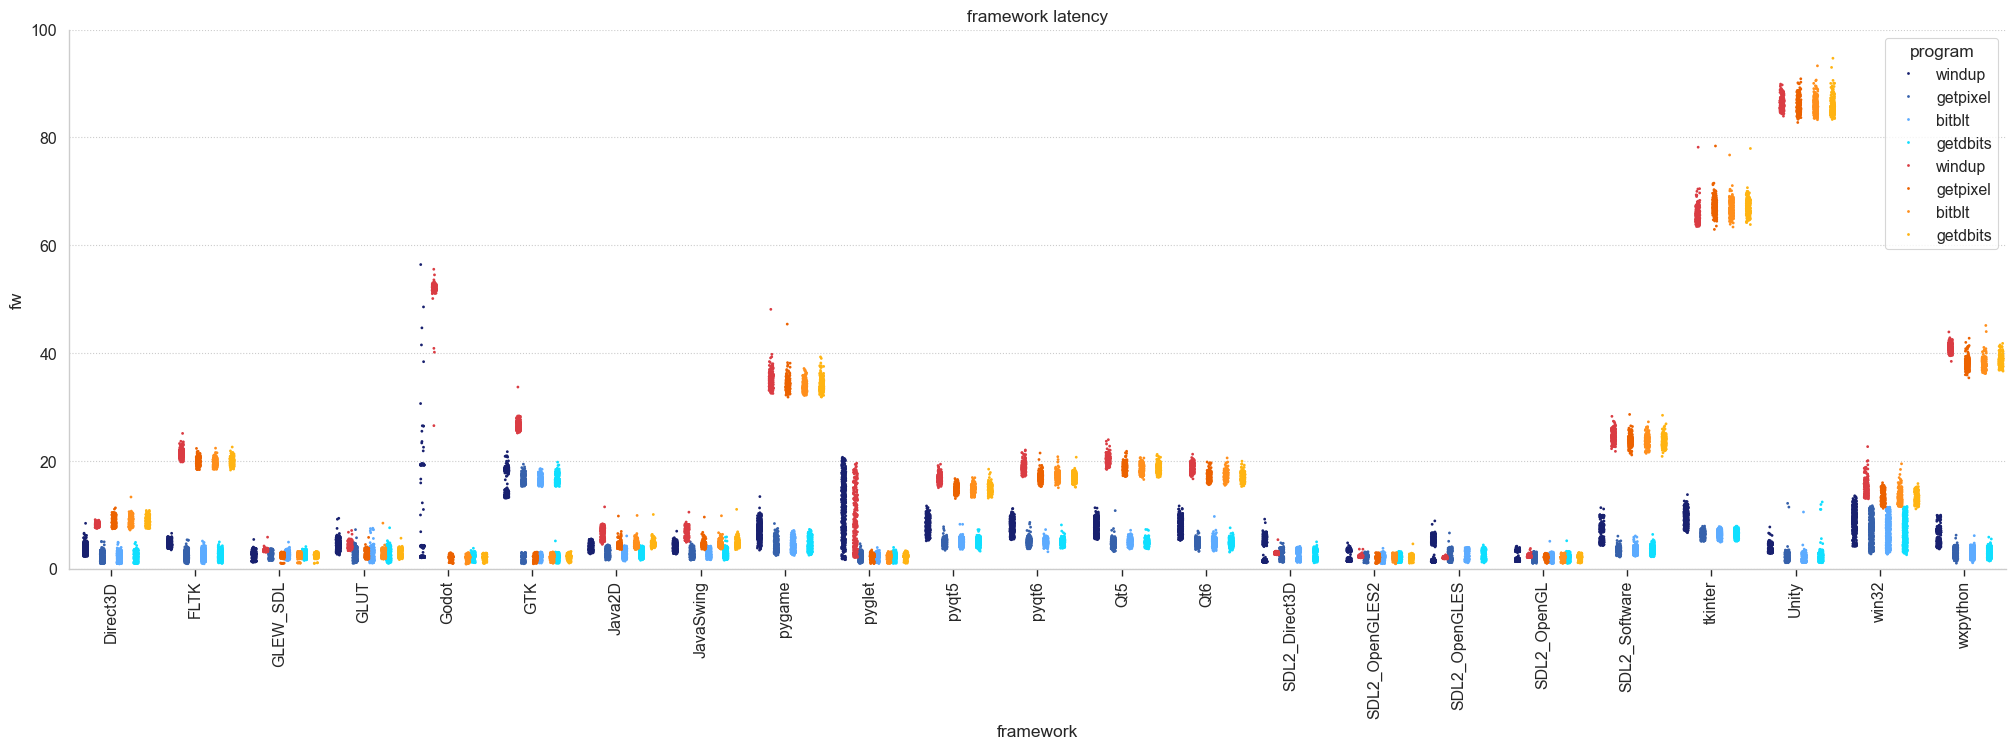

In [101]:
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plot = sns.stripplot(data=data[data['complexity'] == 'default'], x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_BLUES, size=2)
sns.stripplot(data=data[data['complexity'] == 'rects'], x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_REDS, transform=offset(0.1)+trans, size=2)
sns.stripplot(data=data[data['complexity'] == '3D'], x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_HEIDENELKE, transform=offset(0.1)+trans, size=2)

plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.axes.set_ylim(0, 100)

handles, labels = plot.get_legend_handles_labels()

print(labels)
# plot.legend(handles, [labels[0] + ', default', labels[1] + ', default',
#                       labels[2] + ', default', labels[3] + ', default',
#                       labels[4] + ', rects', labels[5] + ', rects',
#                       labels[6] + ', rects', labels[7] + ', rects',
#                       labels[8] + ', 3D', labels[9] + ', 3D',
#                       labels[10] + ', 3D', labels[11] + ', 3D'], markerscale=5.)
plot.set_title('framework latency')
sns.despine(bottom = False, left = False)



### Framework Latencies per Complexity Condition Separately

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_16112\58910804.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


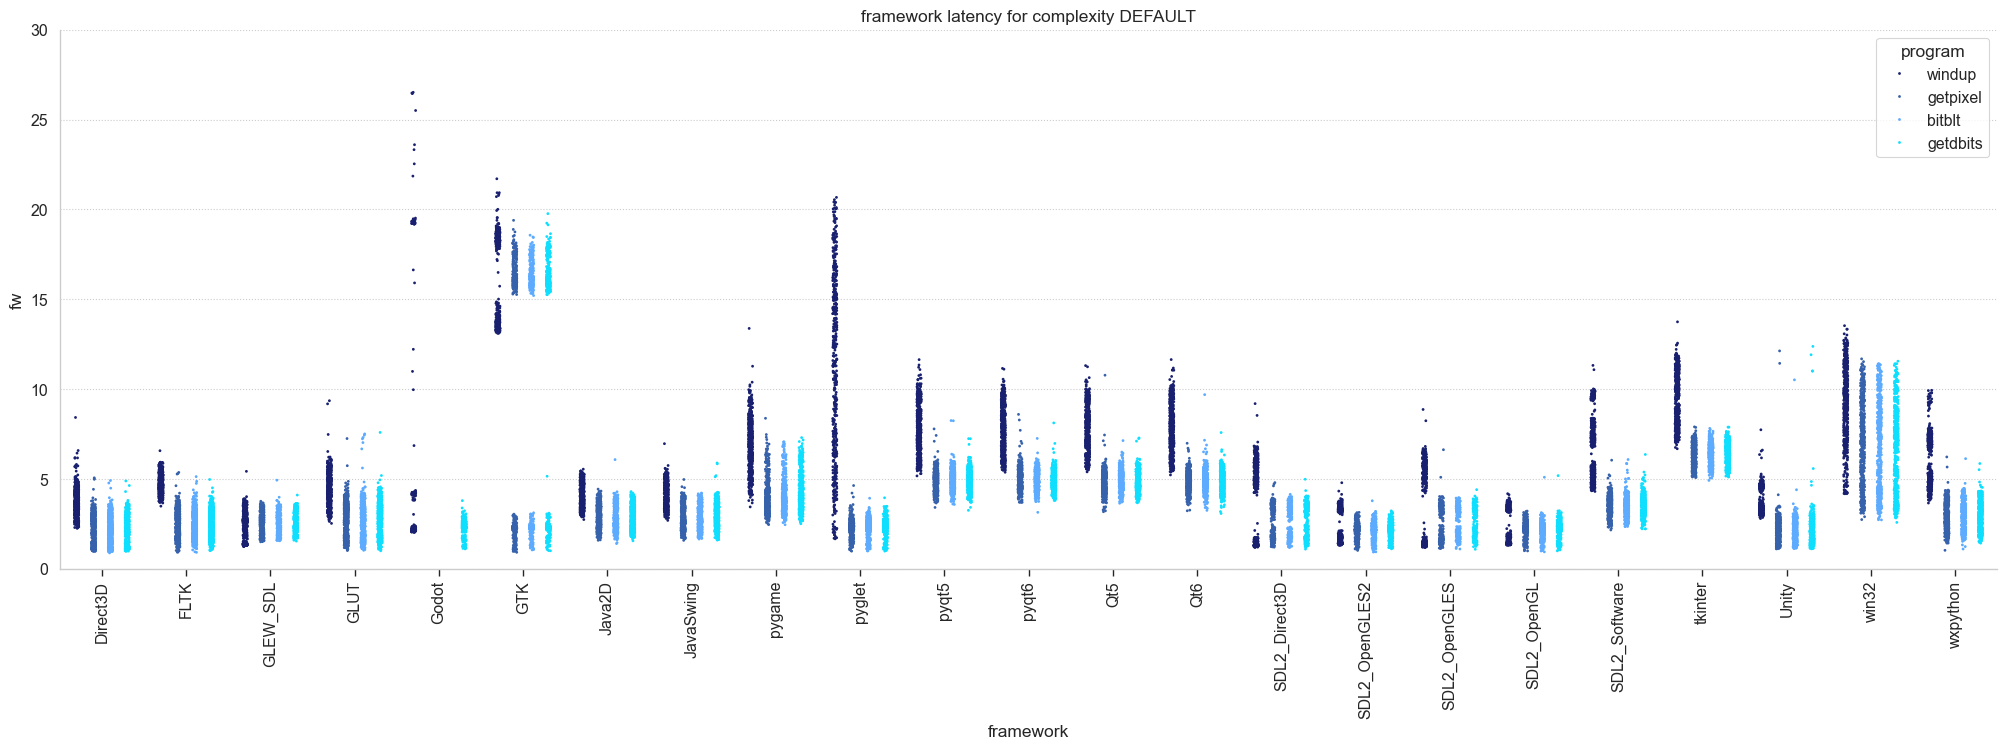

In [102]:
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

data_temp = data[data['complexity'] == 'default']
plot = sns.stripplot(data=data_temp, x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_BLUES, size=2)

plot.set_ylim(0, 30)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_title('framework latency for complexity DEFAULT')
sns.despine(bottom = False, left = False)

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_16112\3926600980.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


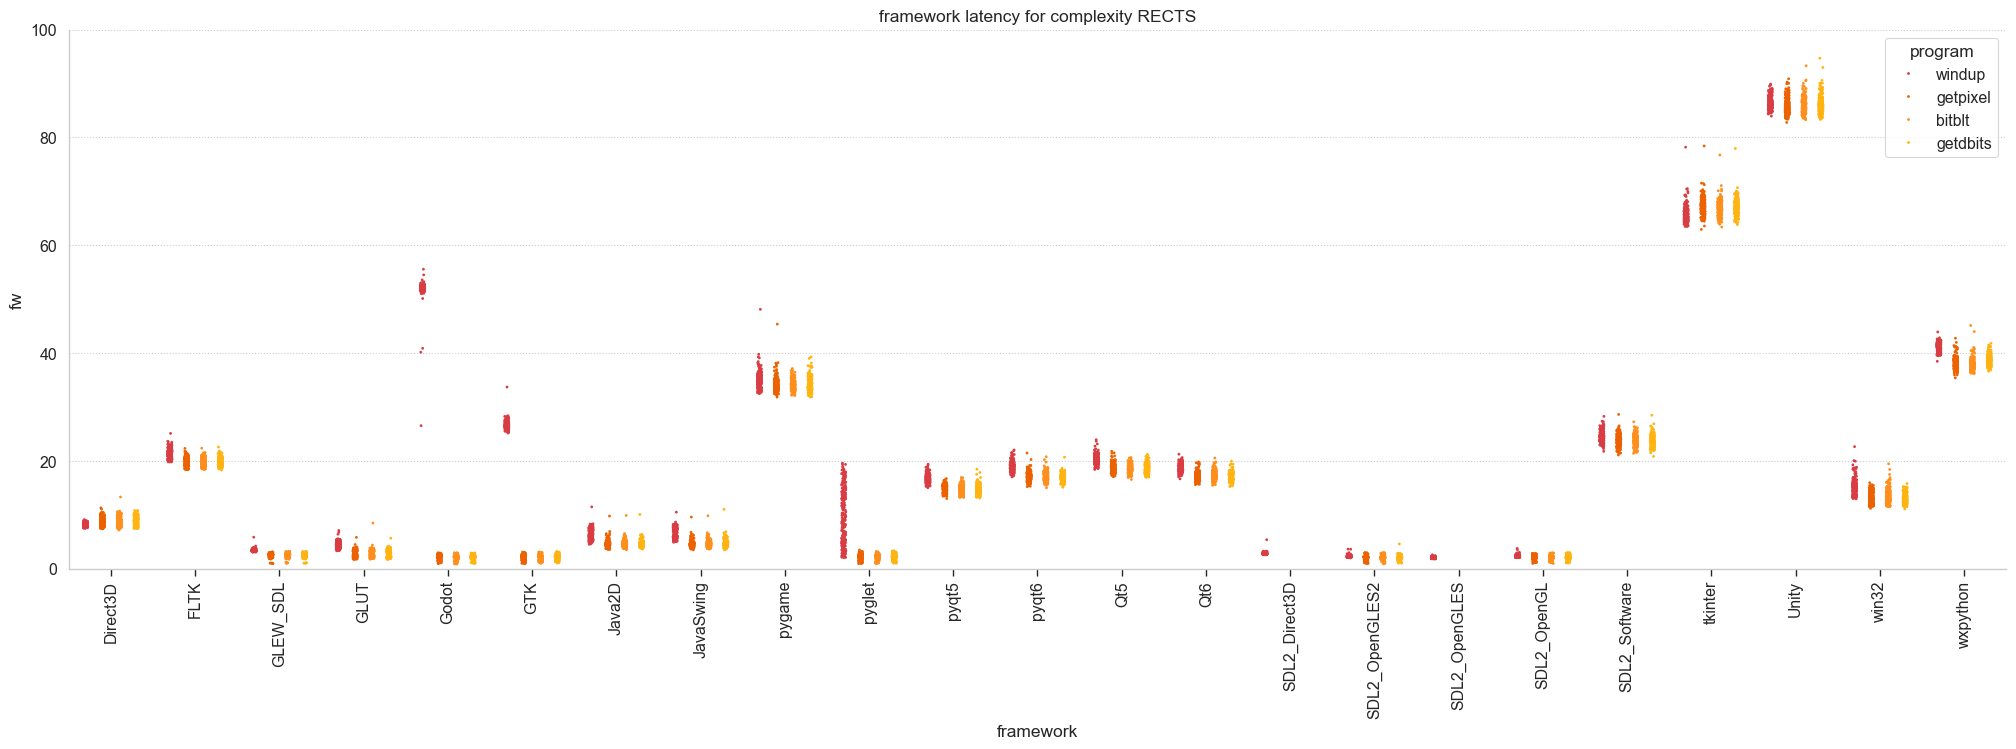

In [103]:
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

data_temp = data[data['complexity'] == 'rects']
plot = sns.stripplot(data=data_temp, x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_REDS, size=2)

plot.set_ylim(0, 100)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_title('framework latency for complexity RECTS')
sns.despine(bottom = False, left = False)

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_16112\974564237.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


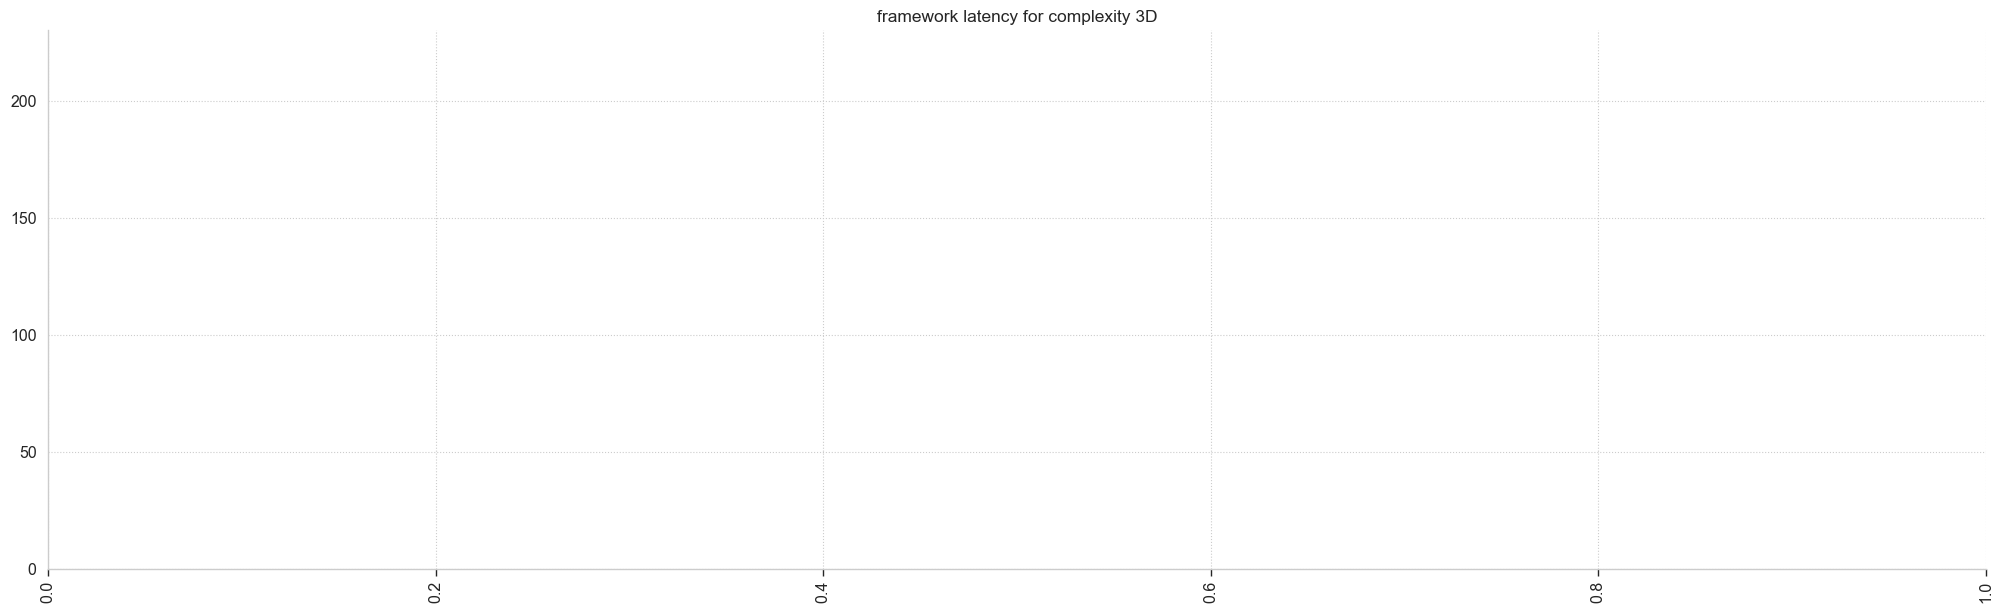

In [104]:
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

data_temp = data[data['complexity'] == '3D']
plot = sns.stripplot(data=data_temp, x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_HEIDENELKE, size=4)

plot.set_ylim(0, 230)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_title('framework latency for complexity 3D')
sns.despine(bottom = False, left = False)

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_16112\2520652837.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


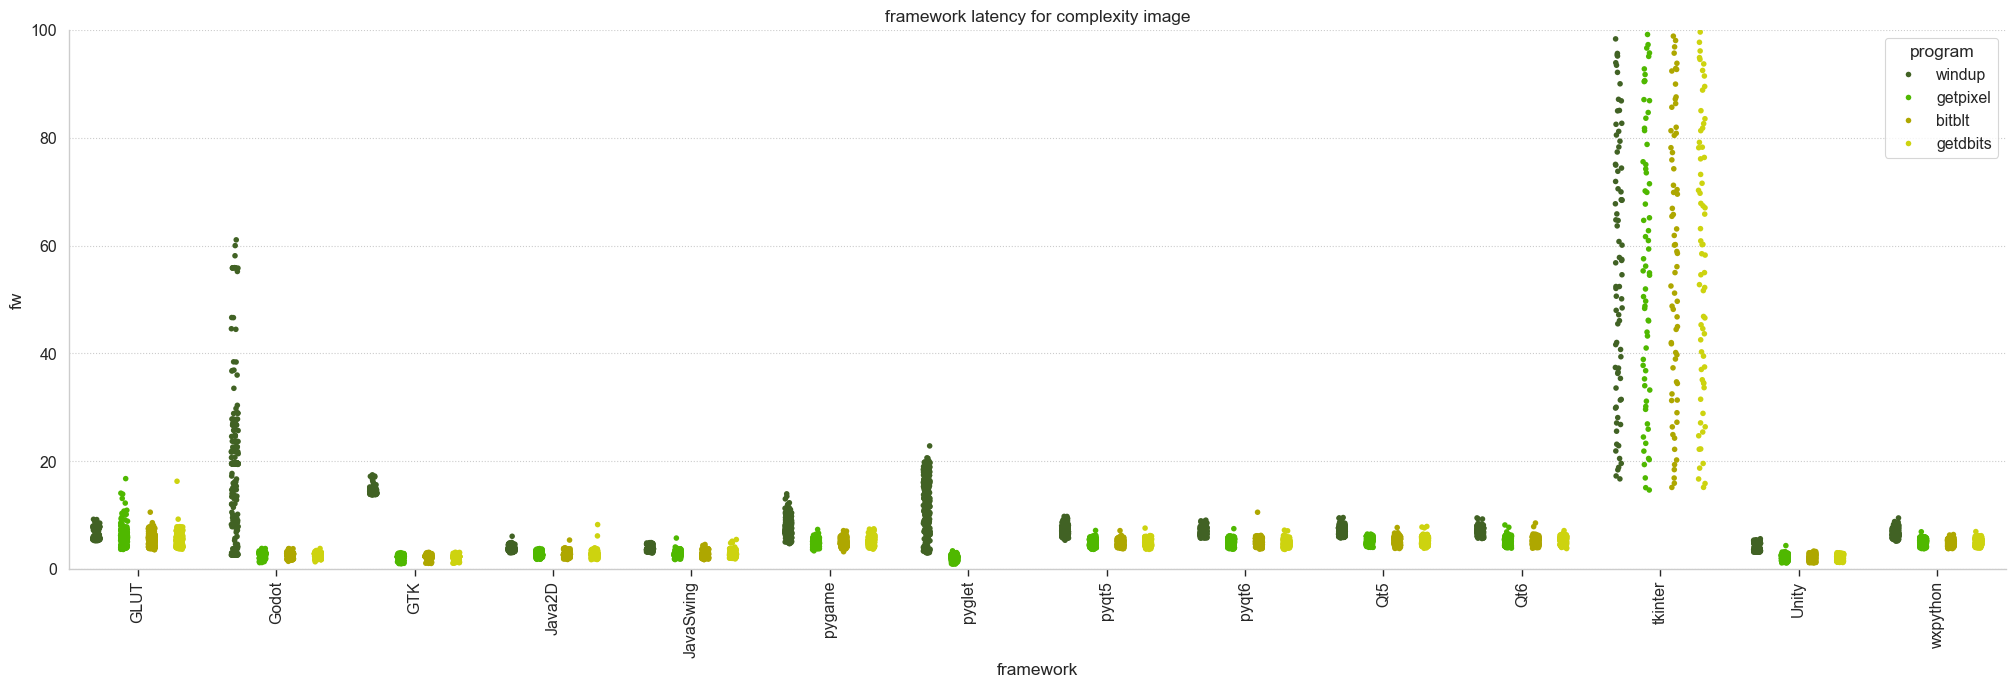

In [111]:
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

data_temp = data[data['complexity'] == 'image']
plot = sns.stripplot(data=data_temp, x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_GREENS, size=4)

plot.set_ylim(0, 100)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_title('framework latency for complexity image')
sns.despine(bottom = False, left = False)

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_16112\3139200066.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[3].set_xticklabels(axs[3].get_xticklabels(), rotation=90)


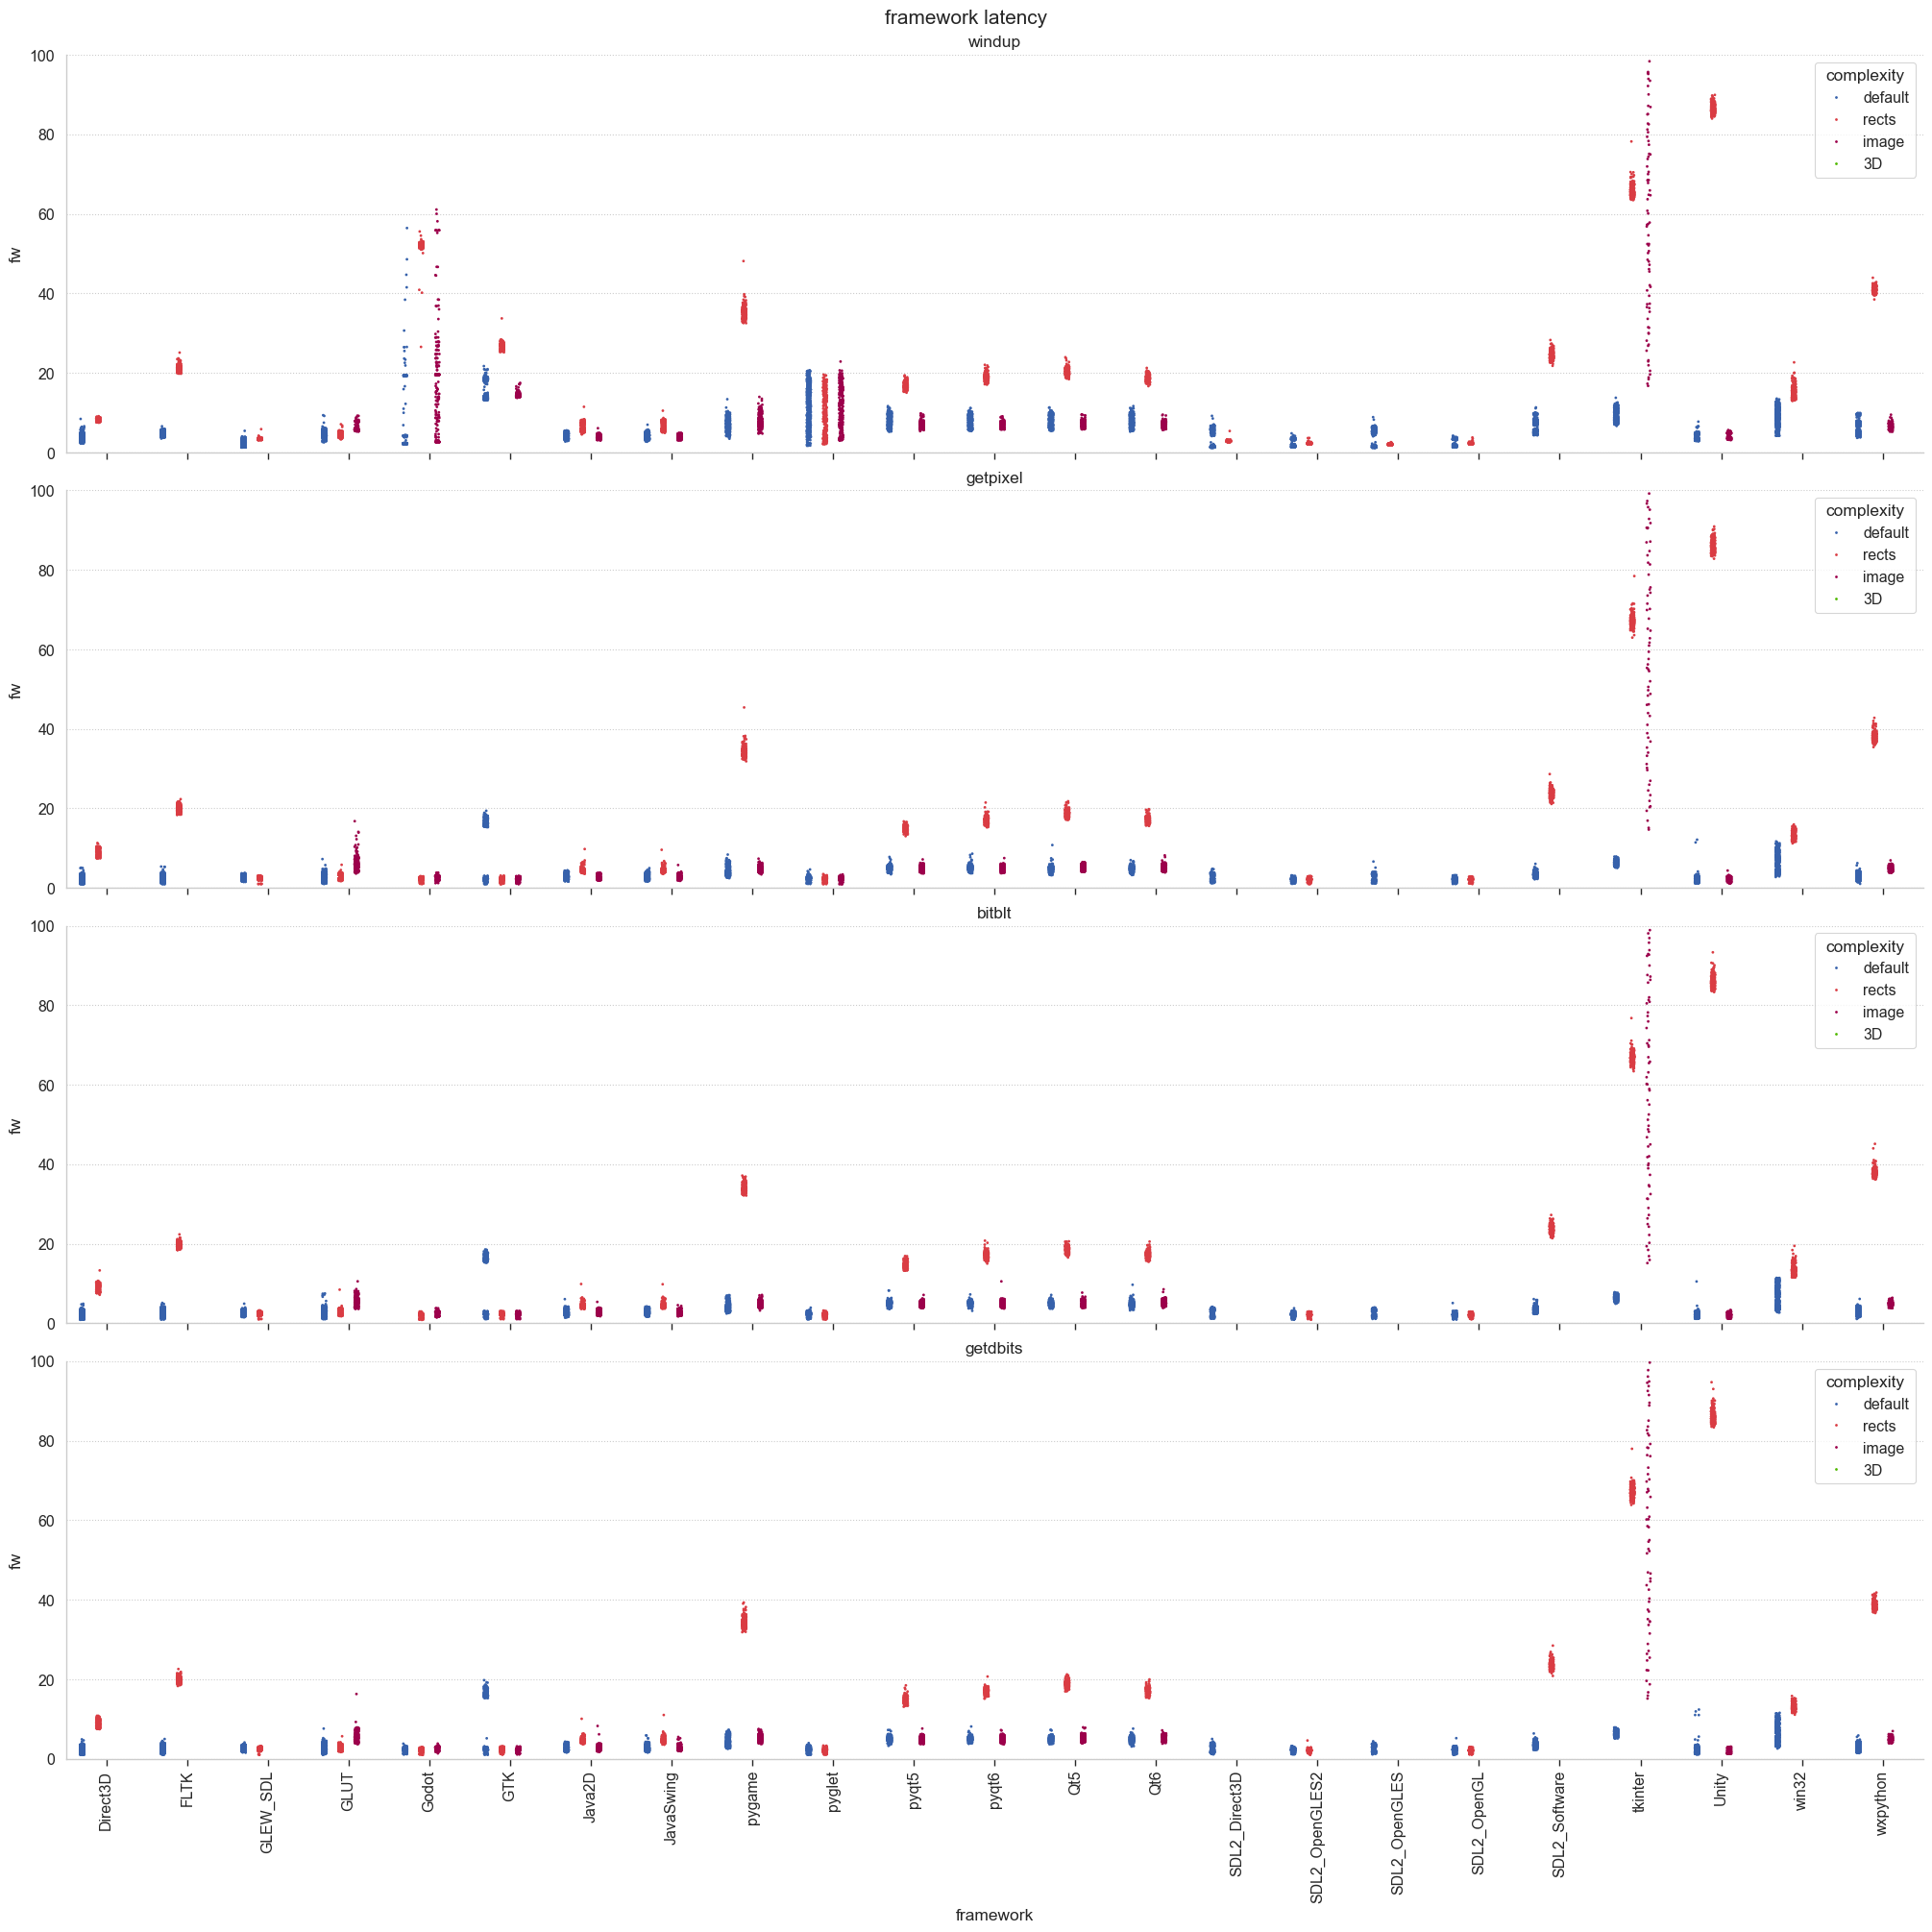

In [105]:
fig, axs = plt.subplots(4, 1, layout='constrained', sharex=True, figsize=(20, 20))
fig.suptitle("framework latency")

plot_windup = sns.stripplot(ax=axs[0], data=data[data['program'] == 'windup'], x='framework', y='fw', hue='complexity', hue_order=['default', 'rects', 'image', '3D'], dodge=True, palette=PALETTE_MULTI, size=2)
plot_windup.set_title('windup')
axs[0].set_ylim(0, 100)

plot_getpixel = sns.stripplot(ax=axs[1], data=data[data['program'] == 'getpixel'], x='framework', y='fw', hue='complexity', hue_order=['default', 'rects', 'image', '3D'], dodge=True, palette=PALETTE_MULTI, size=2)
plot_getpixel.set_title('getpixel')
axs[1].set_ylim(0, 100)

plot_bitblt = sns.stripplot(ax=axs[2], data=data[data['program'] == 'bitblt'], x='framework', y='fw', hue='complexity', hue_order=['default', 'rects', 'image', '3D'], dodge=True, palette=PALETTE_MULTI, size=2)
plot_bitblt.set_title('bitblt')
axs[2].set_ylim(0, 100)

plot_getdbits = sns.stripplot(ax=axs[3], data=data[data['program'] == 'getdbits'], x='framework', y='fw', hue='complexity', hue_order=['default', 'rects', 'image', '3D'], dodge=True, palette=PALETTE_MULTI, size=2)
plot_getdbits.set_title('getdbits')
axs[3].set_ylim(0, 100)

axs[3].set_xticklabels(axs[3].get_xticklabels(), rotation=90)

sns.despine(bottom = False, left = False)

In [106]:
# default
data_temp = data[data['complexity'] == 'default']
medians = pd.DataFrame(columns=['framework', 'windup', 'getpixel', 'bitblt', 'getdbits'])
for i, framework in enumerate(framework_list):
    data_fw = data_temp[data_temp['framework'] == framework]
    median_windup = data_fw[data_fw['program'] == 'windup']['fw'].median()
    median_getpixel = data_fw[data_fw['program'] == 'getpixel']['fw'].median()
    median_bitblt = data_fw[data_fw['program'] == 'bitblt']['fw'].median()
    median_getdbits = data_fw[data_fw['program'] == 'getdbits']['fw'].median()
    medians.loc[i] = [framework, median_windup, median_getpixel, median_bitblt, median_getdbits]

print(medians.to_latex(index=False,
                  formatters={"name": str.upper},
                  float_format="{:.2f}".format,
))
medians


\begin{tabular}{lrrrr}
\toprule
framework & windup & getpixel & bitblt & getdbits \\
\midrule
Direct3D & 3.66 & 2.23 & 2.25 & 2.23 \\
FLTK & 4.65 & 2.42 & 2.40 & 2.35 \\
GLEW_SDL & 2.63 & 2.60 & 2.59 & 2.61 \\
GLUT & 4.48 & 2.80 & 2.69 & 2.82 \\
Godot & 2.23 & NaN & NaN & 2.37 \\
GTK & 17.36 & 9.15 & 9.16 & 10.20 \\
Java2D & 3.80 & 2.78 & 2.66 & 2.76 \\
JavaSwing & 3.85 & 2.69 & 2.72 & 2.78 \\
pygame & 7.03 & 3.71 & 3.74 & 3.80 \\
pyglet & 11.64 & 2.35 & 2.40 & 2.37 \\
pyqt5 & 7.86 & 4.98 & 4.97 & 4.95 \\
pyqt6 & 7.87 & 4.98 & 4.98 & 4.90 \\
Qt5 & 7.86 & 4.82 & 4.95 & 4.86 \\
Qt6 & 7.81 & 4.88 & 4.92 & 4.83 \\
SDL2_Direct3D & 3.30 & 2.86 & 2.94 & 2.51 \\
SDL2_OpenGLES2 & 3.02 & 2.19 & 2.19 & 2.20 \\
SDL2_OpenGLES & 4.12 & 2.93 & 2.65 & 2.27 \\
SDL2_OpenGL & 3.04 & 2.19 & 2.19 & 2.22 \\
SDL2_Software & 6.76 & 3.47 & 3.48 & 3.43 \\
tkinter & 9.46 & 6.46 & 6.45 & 6.53 \\
Unity & 3.59 & 2.13 & 2.10 & 2.12 \\
win32 & 9.15 & 6.93 & 6.69 & 6.72 \\
wxpython & 6.44 & 2.84 & 2.83 & 2.88 \\
\bott

,framework,windup,getpixel,bitblt,getdbits
0,Direct3D,3.6595,2.2290,2.2460,2.2300
1,FLTK,4.6505,2.4190,2.4045,2.3485
2,GLEW_SDL,2.6280,2.6040,2.5895,2.6085
3,GLUT,4.4755,2.7965,2.6865,2.8240
4,Godot,2.2260,NaN,NaN,2.3690
5,GTK,17.3565,9.1460,9.1550,10.1965
6,Java2D,3.7995,2.7780,2.6635,2.7600
7,JavaSwing,3.8500,2.6850,2.7245,2.7790
8,pygame,7.0295,3.7070,3.7365,3.7995
9,pyglet,11.6410,2.3460,2.4035,2.3745


In [107]:
# image
data_temp = data[data['complexity'] == 'image']
medians = pd.DataFrame(columns=['framework', 'windup', 'getpixel', 'bitblt', 'getdbits'])
for i, framework in enumerate(framework_list):
    data_fw = data_temp[data_temp['framework'] == framework]
    median_windup = data_fw[data_fw['program'] == 'windup']['fw'].median()
    median_getpixel = data_fw[data_fw['program'] == 'getpixel']['fw'].median()
    median_bitblt = data_fw[data_fw['program'] == 'bitblt']['fw'].median()
    median_getdbits = data_fw[data_fw['program'] == 'getdbits']['fw'].median()
    medians.loc[i] = [framework, median_windup, median_getpixel, median_bitblt, median_getdbits]

print(medians.to_latex(index=False,
                  formatters={"name": str.upper},
                  float_format="{:.2f}".format,
))
medians

\begin{tabular}{lrrrr}
\toprule
framework & windup & getpixel & bitblt & getdbits \\
\midrule
Direct3D & NaN & NaN & NaN & NaN \\
FLTK & NaN & NaN & NaN & NaN \\
GLEW_SDL & NaN & NaN & NaN & NaN \\
GLUT & 5.77 & 5.73 & 5.27 & 5.52 \\
Godot & 19.54 & 2.85 & 2.81 & 2.85 \\
GTK & 14.20 & 2.29 & 2.29 & 2.32 \\
Java2D & 3.74 & 2.66 & 2.68 & 2.68 \\
JavaSwing & 3.69 & 2.72 & 2.72 & 2.72 \\
pygame & 7.26 & 4.95 & 4.98 & 5.16 \\
pyglet & 11.93 & 2.22 & NaN & NaN \\
pyqt5 & 6.94 & 4.91 & 4.91 & 4.96 \\
pyqt6 & 7.01 & 5.00 & 5.02 & 4.99 \\
Qt5 & 7.21 & 5.28 & 5.29 & 5.23 \\
Qt6 & 7.20 & 5.27 & 5.16 & 5.23 \\
SDL2_Direct3D & NaN & NaN & NaN & NaN \\
SDL2_OpenGLES2 & NaN & NaN & NaN & NaN \\
SDL2_OpenGLES & NaN & NaN & NaN & NaN \\
SDL2_OpenGL & NaN & NaN & NaN & NaN \\
SDL2_Software & NaN & NaN & NaN & NaN \\
tkinter & 148.16 & 175.70 & 175.84 & 176.25 \\
Unity & 4.12 & 2.21 & 2.11 & 1.99 \\
win32 & NaN & NaN & NaN & NaN \\
wxpython & 6.56 & 4.93 & 4.95 & 4.97 \\
\bottomrule
\end{tabular}



,framework,windup,getpixel,bitblt,getdbits
0,Direct3D,NaN,NaN,NaN,NaN
1,FLTK,NaN,NaN,NaN,NaN
2,GLEW_SDL,NaN,NaN,NaN,NaN
3,GLUT,5.7745,5.7315,5.2710,5.5190
4,Godot,19.5355,2.8480,2.8110,2.8530
5,GTK,14.1995,2.2865,2.2895,2.3205
6,Java2D,3.7430,2.6600,2.6845,2.6840
7,JavaSwing,3.6915,2.7245,2.7185,2.7195
8,pygame,7.2565,4.9500,4.9785,5.1575
9,pyglet,11.9340,2.2200,NaN,NaN


In [108]:
# rects
data_temp = data[data['complexity'] == 'rects']
medians = pd.DataFrame(columns=['framework', 'windup', 'getpixel', 'bitblt', 'getdbits'])
for i, framework in enumerate(framework_list):
    data_fw = data_temp[data_temp['framework'] == framework]
    median_windup = data_fw[data_fw['program'] == 'windup']['fw'].median()
    median_getpixel = data_fw[data_fw['program'] == 'getpixel']['fw'].median()
    median_bitblt = data_fw[data_fw['program'] == 'bitblt']['fw'].median()
    median_getdbits = data_fw[data_fw['program'] == 'getdbits']['fw'].median()
    medians.loc[i] = [framework, median_windup, median_getpixel, median_bitblt, median_getdbits]

print(medians.to_latex(index=False,
                  formatters={"name": str.upper},
                  float_format="{:.2f}".format,
))
medians

\begin{tabular}{lrrrr}
\toprule
framework & windup & getpixel & bitblt & getdbits \\
\midrule
Direct3D & 8.18 & 8.71 & 8.63 & 8.80 \\
FLTK & 21.27 & 19.91 & 19.63 & 19.86 \\
GLEW_SDL & 3.34 & 2.60 & 2.58 & 2.60 \\
GLUT & 4.48 & 2.46 & 2.54 & 2.71 \\
Godot & 52.08 & 2.16 & 2.14 & 2.19 \\
GTK & 26.55 & 2.25 & 2.26 & 2.28 \\
Java2D & 6.45 & 4.51 & 4.49 & 4.55 \\
JavaSwing & 6.84 & 4.50 & 4.49 & 4.54 \\
pygame & 35.11 & 33.88 & 33.74 & 33.96 \\
pyglet & 9.52 & 2.25 & 2.25 & 2.25 \\
pyqt5 & 16.76 & 14.76 & 14.69 & 14.89 \\
pyqt6 & 18.80 & 17.07 & 17.14 & 16.95 \\
Qt5 & 20.34 & 18.69 & 18.60 & 18.66 \\
Qt6 & 18.65 & 17.13 & 17.29 & 17.17 \\
SDL2_Direct3D & 2.75 & NaN & NaN & NaN \\
SDL2_OpenGLES2 & 2.18 & 2.13 & 2.15 & 2.14 \\
SDL2_OpenGLES & 1.94 & NaN & NaN & NaN \\
SDL2_OpenGL & 2.23 & 2.12 & 2.12 & 2.13 \\
SDL2_Software & 24.48 & 23.85 & 23.68 & 23.69 \\
tkinter & 65.45 & 67.16 & 66.72 & 66.99 \\
Unity & 86.26 & 85.50 & 85.76 & 85.61 \\
win32 & 15.12 & 12.97 & 13.09 & 12.83 \\
wxpython &

,framework,windup,getpixel,bitblt,getdbits
0,Direct3D,8.1750,8.7085,8.6335,8.8005
1,FLTK,21.2710,19.9115,19.6255,19.8570
2,GLEW_SDL,3.3445,2.5950,2.5825,2.6040
3,GLUT,4.4790,2.4555,2.5440,2.7140
4,Godot,52.0845,2.1640,2.1375,2.1880
5,GTK,26.5450,2.2490,2.2590,2.2755
6,Java2D,6.4490,4.5060,4.4935,4.5455
7,JavaSwing,6.8385,4.5020,4.4870,4.5430
8,pygame,35.1110,33.8775,33.7415,33.9620
9,pyglet,9.5160,2.2525,2.2490,2.2550


In [109]:
# 3D
data_temp = data[data['complexity'] == '3D']
medians = pd.DataFrame(columns=['framework', 'windup', 'getpixel', 'bitblt', 'getdbits'])
for i, framework in enumerate(framework_list):
    data_fw = data_temp[data_temp['framework'] == framework]
    median_windup = data_fw[data_fw['program'] == 'windup']['fw'].median()
    median_getpixel = data_fw[data_fw['program'] == 'getpixel']['fw'].median()
    median_bitblt = data_fw[data_fw['program'] == 'bitblt']['fw'].median()
    median_getdbits = data_fw[data_fw['program'] == 'getdbits']['fw'].median()
    medians.loc[i] = [framework, median_windup, median_getpixel, median_bitblt, median_getdbits]

print(medians.to_latex(index=False,
                  formatters={"name": str.upper},
                  float_format="{:.2f}".format,
))
medians

\begin{tabular}{lrrrr}
\toprule
framework & windup & getpixel & bitblt & getdbits \\
\midrule
Direct3D & NaN & NaN & NaN & NaN \\
FLTK & NaN & NaN & NaN & NaN \\
GLEW_SDL & NaN & NaN & NaN & NaN \\
GLUT & NaN & NaN & NaN & NaN \\
Godot & NaN & NaN & NaN & NaN \\
GTK & NaN & NaN & NaN & NaN \\
Java2D & NaN & NaN & NaN & NaN \\
JavaSwing & NaN & NaN & NaN & NaN \\
pygame & NaN & NaN & NaN & NaN \\
pyglet & NaN & NaN & NaN & NaN \\
pyqt5 & NaN & NaN & NaN & NaN \\
pyqt6 & NaN & NaN & NaN & NaN \\
Qt5 & NaN & NaN & NaN & NaN \\
Qt6 & NaN & NaN & NaN & NaN \\
SDL2_Direct3D & NaN & NaN & NaN & NaN \\
SDL2_OpenGLES2 & NaN & NaN & NaN & NaN \\
SDL2_OpenGLES & NaN & NaN & NaN & NaN \\
SDL2_OpenGL & NaN & NaN & NaN & NaN \\
SDL2_Software & NaN & NaN & NaN & NaN \\
tkinter & NaN & NaN & NaN & NaN \\
Unity & NaN & NaN & NaN & NaN \\
win32 & NaN & NaN & NaN & NaN \\
wxpython & NaN & NaN & NaN & NaN \\
\bottomrule
\end{tabular}



,framework,windup,getpixel,bitblt,getdbits
0,Direct3D,NaN,NaN,NaN,NaN
1,FLTK,NaN,NaN,NaN,NaN
2,GLEW_SDL,NaN,NaN,NaN,NaN
3,GLUT,NaN,NaN,NaN,NaN
4,Godot,NaN,NaN,NaN,NaN
5,GTK,NaN,NaN,NaN,NaN
6,Java2D,NaN,NaN,NaN,NaN
7,JavaSwing,NaN,NaN,NaN,NaN
8,pygame,NaN,NaN,NaN,NaN
9,pyglet,NaN,NaN,NaN,NaN
